In [1]:
import numpy as np
import pandas as pd
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV

In [2]:
from tqdm import tqdm
import logging

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
### Inputing Data
user_item_rating = pd.read_parquet("../data/dicoding_user_item_rating.gzip", columns=["user_id", "course_id", "rating"])

In [4]:
min_ratings = 5
filter_items = user_item_rating['course_id'].value_counts() > min_ratings
filter_items = filter_items[filter_items].index.tolist()

min_user_ratings = 5
filter_users = user_item_rating['user_id'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

user_item_rating_new = user_item_rating[(user_item_rating['course_id'].isin(filter_items)) & (user_item_rating['user_id'].isin(filter_users))]
print('The new data frame shape:\t{} | {} users | {} items'.format(user_item_rating.shape, 
                                                                   user_item_rating.user_id.nunique(), 
                                                                   user_item_rating.course_id.nunique()))

print('The new data frame shape:\t{} | {} users | {} items'.format(user_item_rating_new.shape, 
                                                                   user_item_rating_new.user_id.nunique(), 
                                                                   user_item_rating_new.course_id.nunique()))

#del user_item_rating

The new data frame shape:	(303956, 3) | 103395 users | 63 items
The new data frame shape:	(127540, 3) | 14059 users | 63 items


In [5]:
### Transforming data input to Surprise reader
surprise_reader = Reader(rating_scale=(1, 5))
surprise_data_user_item = Dataset.load_from_df(
    user_item_rating_new[["user_id", "course_id", "rating"]],
    surprise_reader)

In [8]:
# Iterate over all algorithms
algorithms = [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]

print("Attempting: ", str(algorithms), '\n\n\n')

# Initialize an empty dictionary to accumulate results
results_dict = {}

for i in tqdm(range(1, 11, 1)):
    len_used = user_item_rating_new.shape[0] * i * 0.1
    inused_data = user_item_rating_new.sample(int(len_used))

    # A reader is still needed but only the rating_scale param is required.
    ### Transforming data input to Surprise reader
    surprise_reader = Reader(rating_scale=(1, 5))
    data = Dataset.load_from_df(
        inused_data[["user_id", "course_id", "rating"]],
        surprise_reader)
    
    # The columns must correspond to user id, item id, and ratings (in that order).
    

    test_rmse = {}
    test_time = {}
    fit_time = {}  # Dictionary to store results for this iteration

    for algorithm in algorithms:
        print("Starting: ", str(algorithm))
        # Perform cross validation
        results = cross_validate(algorithm, data, measures=['RMSE'], cv=10, verbose=False)

        # Store results for this algorithm in the dictionary
        algorithm_name = str(algorithm).split(' ')[0].split('.')[-1]
        test_rmse[algorithm_name] = np.mean(results['test_rmse']),
        test_time[algorithm_name] = np.mean(results['test_time']),
        fit_time[algorithm_name] = np.mean(results['fit_time'])

    # Store the iteration results in the main dictionary
    results_dict[f'Iteration_{i}'] = {
        'test_rmse':test_rmse,
        'test_time':test_time,
        'fit_time':fit_time
    }

print('\n\tDONE\n')


Attempting:  [<surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7ff803605690>, <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x7ff8036b2ec0>, <surprise.prediction_algorithms.slope_one.SlopeOne object at 0x7ff8036b2650>, <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x7ff8036b0430>, <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7ff8036b09a0>, <surprise.prediction_algorithms.knns.KNNBaseline object at 0x7ff83178f5e0>, <surprise.prediction_algorithms.knns.KNNBasic object at 0x7ff83178c7f0>, <surprise.prediction_algorithms.knns.KNNWithMeans object at 0x7ff83178d480>, <surprise.prediction_algorithms.knns.KNNWithZScore object at 0x7ff83178ca30>, <surprise.prediction_algorithms.baseline_only.BaselineOnly object at 0x7ff83178c8e0>, <surprise.prediction_algorithms.co_clustering.CoClustering object at 0x7ff803536d70>] 


  0%|          | 0/10 [00:00<?, ?it/s]

Starting:  <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7ff803605690>
Starting:  <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x7ff8036b2ec0>
Starting:  <surprise.prediction_algorithms.slope_one.SlopeOne object at 0x7ff8036b2650>
Starting:  <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x7ff8036b0430>
Starting:  <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7ff8036b09a0>
Starting:  <surprise.prediction_algorithms.knns.KNNBaseline object at 0x7ff83178f5e0>
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als..

 10%|█         | 1/10 [00:59<08:57, 59.72s/it]

Starting:  <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7ff803605690>
Starting:  <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x7ff8036b2ec0>
Starting:  <surprise.prediction_algorithms.slope_one.SlopeOne object at 0x7ff8036b2650>
Starting:  <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x7ff8036b0430>
Starting:  <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7ff8036b09a0>
Starting:  <surprise.prediction_algorithms.knns.KNNBaseline object at 0x7ff83178f5e0>
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als..

 20%|██        | 2/10 [03:41<16:00, 120.04s/it]

Starting:  <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7ff803605690>
Starting:  <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x7ff8036b2ec0>
Starting:  <surprise.prediction_algorithms.slope_one.SlopeOne object at 0x7ff8036b2650>
Starting:  <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x7ff8036b0430>
Starting:  <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7ff8036b09a0>
Starting:  <surprise.prediction_algorithms.knns.KNNBaseline object at 0x7ff83178f5e0>
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als..

 30%|███       | 3/10 [08:52<24:09, 207.13s/it]

Starting:  <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7ff803605690>
Starting:  <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x7ff8036b2ec0>
Starting:  <surprise.prediction_algorithms.slope_one.SlopeOne object at 0x7ff8036b2650>
Starting:  <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x7ff8036b0430>
Starting:  <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7ff8036b09a0>
Starting:  <surprise.prediction_algorithms.knns.KNNBaseline object at 0x7ff83178f5e0>
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als..

 40%|████      | 4/10 [17:12<32:16, 322.80s/it]

Starting:  <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7ff803605690>
Starting:  <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x7ff8036b2ec0>
Starting:  <surprise.prediction_algorithms.slope_one.SlopeOne object at 0x7ff8036b2650>
Starting:  <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x7ff8036b0430>
Starting:  <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7ff8036b09a0>
Starting:  <surprise.prediction_algorithms.knns.KNNBaseline object at 0x7ff83178f5e0>
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als..

 50%|█████     | 5/10 [29:30<39:21, 472.38s/it]

Starting:  <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7ff803605690>
Starting:  <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x7ff8036b2ec0>
Starting:  <surprise.prediction_algorithms.slope_one.SlopeOne object at 0x7ff8036b2650>
Starting:  <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x7ff8036b0430>
Starting:  <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7ff8036b09a0>
Starting:  <surprise.prediction_algorithms.knns.KNNBaseline object at 0x7ff83178f5e0>
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als..

 60%|██████    | 6/10 [46:50<44:21, 665.34s/it]

Starting:  <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7ff803605690>
Starting:  <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x7ff8036b2ec0>
Starting:  <surprise.prediction_algorithms.slope_one.SlopeOne object at 0x7ff8036b2650>
Starting:  <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x7ff8036b0430>
Starting:  <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7ff8036b09a0>
Starting:  <surprise.prediction_algorithms.knns.KNNBaseline object at 0x7ff83178f5e0>
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als..

 70%|███████   | 7/10 [1:09:04<44:11, 883.99s/it]

Starting:  <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7ff803605690>
Starting:  <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x7ff8036b2ec0>
Starting:  <surprise.prediction_algorithms.slope_one.SlopeOne object at 0x7ff8036b2650>
Starting:  <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x7ff8036b0430>
Starting:  <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7ff8036b09a0>
Starting:  <surprise.prediction_algorithms.knns.KNNBaseline object at 0x7ff83178f5e0>
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als..

 80%|████████  | 8/10 [1:37:47<38:22, 1151.15s/it]

Starting:  <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7ff803605690>
Starting:  <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x7ff8036b2ec0>
Starting:  <surprise.prediction_algorithms.slope_one.SlopeOne object at 0x7ff8036b2650>
Starting:  <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x7ff8036b0430>
Starting:  <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7ff8036b09a0>
Starting:  <surprise.prediction_algorithms.knns.KNNBaseline object at 0x7ff83178f5e0>
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als..

 90%|█████████ | 9/10 [2:13:48<24:26, 1466.63s/it]

Starting:  <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7ff803605690>
Starting:  <surprise.prediction_algorithms.matrix_factorization.SVDpp object at 0x7ff8036b2ec0>
Starting:  <surprise.prediction_algorithms.slope_one.SlopeOne object at 0x7ff8036b2650>
Starting:  <surprise.prediction_algorithms.matrix_factorization.NMF object at 0x7ff8036b0430>
Starting:  <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x7ff8036b09a0>
Starting:  <surprise.prediction_algorithms.knns.KNNBaseline object at 0x7ff83178f5e0>
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als..

100%|██████████| 10/10 [2:59:39<00:00, 1078.00s/it]


	DONE


In [9]:
results_dict

{'Iteration_1': {'test_rmse': {'SVD': (0.35785588429903875,),
   'SVDpp': (0.3541044651455068,),
   'SlopeOne': (0.386715711608714,),
   'NMF': (0.6962032493793026,),
   'NormalPredictor': (0.4461578027793731,),
   'KNNBaseline': (0.3640286642245959,),
   'KNNBasic': (0.36762570134007955,),
   'KNNWithMeans': (0.3775263023527785,),
   'KNNWithZScore': (0.3773473858610349,),
   'BaselineOnly': (0.3563460139959965,),
   'CoClustering': (0.4143198022626569,)},
  'test_time': {'SVD': (0.00608980655670166,),
   'SVDpp': (0.00885007381439209,),
   'SlopeOne': (0.0061248779296875,),
   'NMF': (0.00421757698059082,),
   'NormalPredictor': (0.004185867309570312,),
   'KNNBaseline': (0.14061577320098878,),
   'KNNBasic': (0.1316232919692993,),
   'KNNWithMeans': (0.12621872425079345,),
   'KNNWithZScore': (0.1314758062362671,),
   'BaselineOnly': (0.003398752212524414,),
   'CoClustering': (0.0032905817031860353,)},
  'fit_time': {'SVD': 0.17586140632629393,
   'SVDpp': 0.08871321678161621,
   '

In [10]:
surprise_results = pd.DataFrame.from_dict({(i, j): results_dict[i][j] for i in results_dict.keys() for j in results_dict[i].keys()}, orient='index')

In [11]:
surprise_results

SVD                    SVDpp  \
Iteration_1  test_rmse   (0.35785588429903875,)    (0.3541044651455068,)   
             test_time   (0.00608980655670166,)   (0.00885007381439209,)   
             fit_time                  0.175861                 0.088713   
Iteration_2  test_rmse    (0.3479195876855544,)   (0.34296207693967845,)   
             test_time  (0.011182022094726563,)   (0.02490537166595459,)   
             fit_time                  0.301019                 0.229088   
Iteration_3  test_rmse   (0.34717536324862114,)   (0.34034868795889733,)   
             test_time  (0.015381312370300293,)  (0.042246246337890626,)   
             fit_time                  0.416886                 0.412529   
Iteration_4  test_rmse   (0.33918095805586157,)   (0.33268554468856293,)   
             test_time  (0.041418027877807614,)   (0.09299640655517578,)   
             fit_time                  0.615139                 0.718141   
Iteration_5  test_rmse    (0.3367745216053116,)    (0.3301311638358293,)   
             test_time   (0.02630765438079834,)   (0.09839556217193604,)   
             fit_time                   0.72566                 0.854274   
Iteration_6  test_rmse    (0.3339580464057089,)    (0.3271795831402555,)   
             test_time   (0.03299398422241211,)    (0.1097689151763916,)   
             fit_time                  0.939036                 1.152638   
Iteration_7  test_rmse    (0.3276932759644848,)    (0.3214379302607173,)   
             test_time    (0.0379657506942749,)    (0.1578953742980957,)   
             fit_time                  1.029871                 1.458725   
Iteration_8  test_rmse    (0.3272449670458803,)     (0.321405377446106,)   
             test_time   (0.06670708656311035,)    (0.1566236734390259,)   
             fit_time                  1.194635                 1.726075   
Iteration_9  test_rmse    (0.3223032706465313,)      (0.31707009325586,)   
             test_time   (0.07107274532318116,)   (0.18366191387176514,)   
             fit_time                  1.335063                 2.036799   
Iteration_10 test_rmse    (0.3199545656213008,)   (0.31482564784500744,)   
             test_time   (0.05622553825378418,)    (0.2672813653945923,)   
             fit_time                  1.564329                 2.432811   

                                       SlopeOne                      NMF  \
Iteration_1  test_rmse     (0.386715711608714,)    (0.6962032493793026,)   
             test_time    (0.0061248779296875,)   (0.00421757698059082,)   
             fit_time                  0.054581                 0.407701   
Iteration_2  test_rmse   (0.37849790624210505,)    (0.7340834165410028,)   
             test_time   (0.01474902629852295,)  (0.008789515495300293,)   
             fit_time                   0.08485                 0.764664   
Iteration_3  test_rmse   (0.36236249815705734,)    (0.6685644567082594,)   
             test_time   (0.02483029365539551,)  (0.013562750816345216,)   
             fit_time                  0.107749                 1.069195   
Iteration_4  test_rmse   (0.34898960750243246,)     (0.630949827390001,)   
             test_time  (0.056589484214782715,)  (0.019524455070495605,)   
             fit_time                   0.16874                 1.586305   
Iteration_5  test_rmse    (0.3383173831830601,)    (0.6004858970286013,)   
             test_time   (0.05447254180908203,)   (0.02242400646209717,)   
             fit_time                  0.139887                 1.614236   
Iteration_6  test_rmse    (0.3334503284847007,)    (0.5593565277409089,)   
             test_time   (0.07863936424255372,)  (0.028257584571838378,)   
             fit_time                  0.166701                 2.182628   
Iteration_7  test_rmse    (0.3250047997189669,)    (0.5372656067990527,)   
             test_time   (0.12100727558135986,)  (0.056092143058776855,)   
             fit_time                  0.178832                 2.255074   
Iteration_8  te

In [12]:
surprise = surprise_results.reset_index().copy()
cols = [c for c in surprise.columns if c != "level_0" and c!= "level_1"]
cols

['SVD',
 'SVDpp',
 'SlopeOne',
 'NMF',
 'NormalPredictor',
 'KNNBaseline',
 'KNNBasic',
 'KNNWithMeans',
 'KNNWithZScore',
 'BaselineOnly',
 'CoClustering']

In [13]:

p,l = surprise.shape

for c in cols:
    df = surprise[c]
   
    for i in range(p):
        d = df[i]
        if isinstance(d, tuple): 
            surprise.loc[i,c] = d[0]

In [14]:
test_rmse = surprise[surprise['level_1']=='test_rmse']
test_time = surprise[surprise['level_1']=='test_time']
fit_time = surprise[surprise['level_1']=='fit_time']

Text(0.5, 1.0, 'Test RMSE')

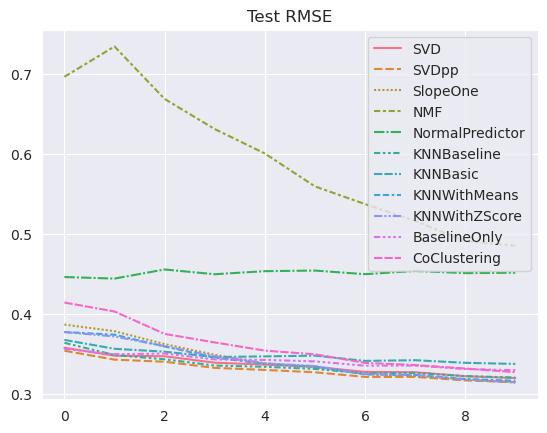

In [29]:
sns.lineplot(data=test_rmse.reset_index().iloc[:,1:])
plt.title("Test RMSE")

Text(0.5, 1.0, 'Fitting Time')

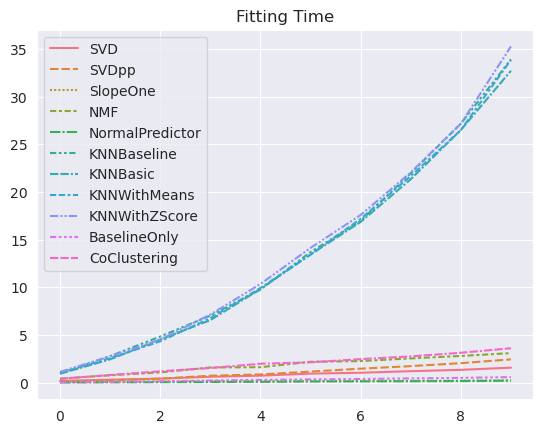

In [26]:
sns.lineplot(data=fit_time.reset_index().iloc[:,1:])
plt.title("Fitting Time")

Text(0.5, 1.0, 'Test Time')

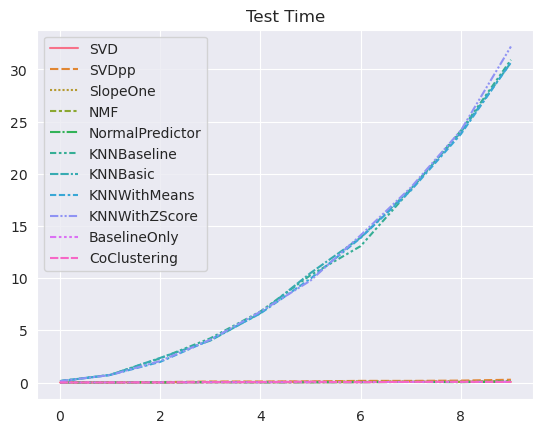

In [27]:
sns.lineplot(data=test_time.reset_index().iloc[:,1:])
plt.title("Test Time")

In [21]:
test_time

,level_0,level_1,SVD,SVDpp,SlopeOne,NMF,NormalPredictor,KNNBaseline,KNNBasic,KNNWithMeans,KNNWithZScore,BaselineOnly,CoClustering
1,Iteration_1,test_time,0.00609,0.00885,0.006125,0.004218,0.004186,0.140616,0.131623,0.126219,0.131476,0.003399,0.003291
4,Iteration_2,test_time,0.011182,0.024905,0.014749,0.00879,0.008414,0.732723,0.725822,0.720095,0.713871,0.007725,0.007737
7,Iteration_3,test_time,0.015381,0.042246,0.02483,0.013563,0.011091,2.316857,2.358881,1.977332,2.059988,0.012691,0.012822
10,Iteration_4,test_time,0.041418,0.092996,0.056589,0.019524,0.031729,4.234344,4.014062,4.087564,4.103389,0.019723,0.038149
13,Iteration_5,test_time,0.026308,0.098396,0.054473,0.022424,0.01839,6.810429,6.652486,6.621044,6.7831,0.02532,0.047437
16,Iteration_6,test_time,0.032994,0.109769,0.078639,0.028258,0.023728,10.28578,10.491078,9.949885,9.768308,0.028441,0.078364
19,Iteration_7,test_time,0.037966,0.157895,0.121007,0.056092,0.02594,13.067821,13.886482,13.858339,14.106971,0.051096,0.031868
22,Iteration_8,test_time,0.066707,0.156624,0.102292,0.059113,0.052918,18.465428,18.538508,18.385843,18.67366,0.056074,0.060577
25,Iteration_9,test_time,0.071073,0.183662,0.120251,0.064488,0.032897,24.12299,23.976064,23.79074,24.141227,0.061475,0.066982
28,Iteration_10,test_time,0.056226,0.267281,0.127413,0.101726,0.102763,30.918398,30.664296,30.679804,32.195765,0.072676,0.050567
